In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import aadt_predictor as ap
import pickle
import numpy as np

In [5]:
RESPONSE_VARS = [ "AADT_MDV", "AADT_HDV"]
OUTDIR = "./"
DATA_DIR = "../data/hpms_aadt_subset.csv"

## Model Benchmark

### National

#### Random Forest

In [27]:
RF_PREDICTOR_VARS = ["STATEFP","COUNTYFP", "F_SYSTEM", "THROUGH_LANES", "AADT"]
RANDOM_STATE = 42

predictor = ap.AADTPredictor(DATA_DIR, None, outdir = OUTDIR, random_state = RANDOM_STATE)

Loading data from ../data/hpms_aadt_subset.csv


c:\Users\achawla1\Desktop\NearRoadExposure\src\aadt_predictor.py:31: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data_full = pd.read_csv(self.data_path)


Full Data loaded successfully: 6598605 rows and 21 columns.
Pre-processing data...
ERROR: The data could not be subsetted. [None]
ERROR: The data could not be loaded. 'NoneType' object has no attribute 'shape'


In [28]:
# MDV
predictor.response_var = RESPONSE_VARS[0]
predictor.subset_train_data()
predictor.split_data(RF_PREDICTOR_VARS, state_fips = None, test_size=0.2)
predictor.initialize_model("Random Forest")
predictor.fit_model()

Training Data subsetted successfully with AADT_MDV: 4766630 rows and 21 columns.
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {}
Model trained successfully


In [29]:
y_pred_mdv_national = predictor.model.predict(predictor.X_test)
y_test_mdv_national = predictor.y_test 
residuals_mdv_national = y_test_mdv_national - y_pred_mdv_national
r2_mdv_national, mae_mdv_national, mse_mdv_national = predictor.test_model()


In [30]:
# save national model rf fit
with open("../data/rf_mdv_national.pkl", "wb") as f:
    pickle.dump(predictor.model, f)

In [31]:
# HDV
predictor.response_var = RESPONSE_VARS[1]
predictor.subset_train_data()
predictor.split_data(RF_PREDICTOR_VARS, state_fips = None, test_size=0.2)
predictor.initialize_model("Random Forest")
predictor.fit_model()

Training Data subsetted successfully with AADT_HDV: 4766451 rows and 21 columns.
Training and testing data split with test size 0.2 on State None and not stratified ...
Random Forest model initialized with- {}
Model trained successfully


In [32]:
y_pred_hdv_national = predictor.model.predict(predictor.X_test)
y_test_hdv_national = predictor.y_test
residuals_hdv_national = y_test_hdv_national - y_pred_hdv_national
r2_hdv_national, mae_hdv_national, mse_hdv_national = predictor.test_model()

In [33]:
with open("../data/rf_hdv_national.pkl", "wb") as f:
    pickle.dump(predictor.model, f)

#### Linear Regression

In [34]:
LR_PREDICTOR_VARS = ["F_SYSTEM", "THROUGH_LANES", "AADT"]

In [35]:
# MDV
predictor.response_var = RESPONSE_VARS[0]
predictor.subset_train_data()
predictor.split_data(LR_PREDICTOR_VARS, state_fips = None, test_size=0.2)
predictor.initialize_model("Linear")
predictor.fit_model()

Training Data subsetted successfully with AADT_MDV: 4766630 rows and 21 columns.
Training and testing data split with test size 0.2 on State None and not stratified ...
Linear model initialized with- {}
Model trained successfully


In [36]:
y_pred_mdv_national_linear = predictor.model.predict(predictor.X_test)
y_test_mdv_national_linear = predictor.y_test
residuals_mdv_national_linear = y_test_mdv_national_linear - y_pred_mdv_national_linear
r2_mdv_national_linear, mae_mdv_national_linear, mse_mdv_national_linear = predictor.test_model()

In [37]:
with open("../data/lr_mdv_national.pkl", "wb") as f:
    pickle.dump(predictor.model, f)

In [38]:
# HDV
predictor.response_var = RESPONSE_VARS[1]
predictor.subset_train_data()
predictor.split_data(LR_PREDICTOR_VARS, state_fips = None, test_size=0.2)
predictor.initialize_model("Linear")
predictor.fit_model()

Training Data subsetted successfully with AADT_HDV: 4766451 rows and 21 columns.
Training and testing data split with test size 0.2 on State None and not stratified ...
Linear model initialized with- {}
Model trained successfully


In [39]:
y_pred_hdv_national_linear = predictor.model.predict(predictor.X_test)
y_test_hdv_national_linear = predictor.y_test
residuals_hdv_national_linear = y_test_hdv_national_linear - y_pred_hdv_national_linear
r2_hdv_national_linear, mae_hdv_national_linear, mse_hdv_national_linear = predictor.test_model()

### State

In [42]:
state_results = []

for state in predictor.data["STATEFP"].unique():
    for response_var in RESPONSE_VARS:
        for model_type in ["Random Forest", "Linear"]:
            print(f"Training model for {state} and {response_var} using {model_type}")
            predictor.response_var = response_var
            predictor.subset_train_data()
            if model_type == "Random Forest":
                predictor.split_data(RF_PREDICTOR_VARS, state_fips = state, test_size=0.2)
            else:
                predictor.split_data(LR_PREDICTOR_VARS, state_fips = state, test_size=0.2)
            predictor.initialize_model(model_type)
            predictor.fit_model()
            y_pred = predictor.model.predict(predictor.X_test)
            y_test = predictor.y_test
            residuals = y_test - y_pred
            r2, mae, mse = predictor.test_model()
            state_results.append({"state": state, "response_var": response_var, "model_type": model_type, "r2": r2, "mae": mae, "mse": mse, "y_pred": y_pred, "y_test": y_test, "y_pred_mean": np.mean(y_pred), "y_test_mean": np.mean(y_test), "residuals": residuals})

Training model for 01 and AADT_MDV using Random Forest
Training Data subsetted successfully with AADT_MDV: 4766630 rows and 21 columns.
Training and testing data split with test size 0.2 on State 01 and not stratified ...
Random Forest model initialized with- {}
Model trained successfully
Training model for 01 and AADT_MDV using Linear
Training Data subsetted successfully with AADT_MDV: 4766630 rows and 21 columns.
Training and testing data split with test size 0.2 on State 01 and not stratified ...
Linear model initialized with- {}
Model trained successfully
Training model for 01 and AADT_HDV using Random Forest
Training Data subsetted successfully with AADT_HDV: 4766451 rows and 21 columns.
Training and testing data split with test size 0.2 on State 01 and not stratified ...
Random Forest model initialized with- {}
Model trained successfully
Training model for 01 and AADT_HDV using Linear
Training Data subsetted successfully with AADT_HDV: 4766451 rows and 21 columns.
Training and te

In [44]:
with open("../data/state_results.pkl", "wb") as f:
    pickle.dump(state_results, f)

In [45]:
import pandas as pd

In [47]:
df = pd.DataFrame(state_results)
df

,state,response_var,model_type,r2,mae,mse,y_pred,y_test,y_pred_mean,y_test_mean,residuals
0,01,AADT_MDV,Random Forest,0.998676,2.956180,8.248552e+02,"[14.0, 83.08, 201.0, 17.0, 228.0, 11.0, 124.0,...",55196 14.0 167618 83.0 139206 201....,334.075580,333.601152,55196 0.000000 167618 -0.080000 139206 ...
1,01,AADT_MDV,Linear,0.643625,244.132656,2.220917e+05,"[319.2904730645655, 291.9888268603049, 155.390...",55196 14.0 167618 83.0 139206 201....,332.349914,333.601152,55196 -305.290473 167618 -208.988827 1392...
2,01,AADT_HDV,Random Forest,0.999176,6.177211,2.976841e+03,"[135.0, 3.0, 1622.0, 159.0, 33.02786091435002,...",153573 135.0 109652 3.0 46098 16...,800.994924,799.259753,153573 0.000000 109652 0.000000 46098 ...
3,01,AADT_HDV,Linear,0.675000,598.660107,1.174031e+06,"[581.3343949725222, -451.7213585978002, 1162.8...",153573 135.0 109652 3.0 46098 16...,786.440738,799.259753,153573 -446.334395 109652 454.721359 46...
4,02,AADT_MDV,Random Forest,0.998646,1.772254,2.843361e+02,"[648.0, 262.0, 98.0, 47.0, 87.0, 345.0, 64.0, ...",232436 648.0 228252 262.0 218430 ...,220.173379,220.083677,232436 0.00 228252 0.00 218430 0.00 2...
...,...,...,...,...,...,...,...,...,...,...,...
199,55,AADT_HDV,Linear,0.623798,804.425184,2.320939e+06,"[1095.6935457225645, 5018.59054200801, 371.245...",6439208 677.0 6463827 2599.0 6429492 ...,1351.849196,1348.604834,6439208 -418.693546 6463827 -2419.590542 ...
200,56,AADT_MDV,Random Forest,0.999944,0.907861,8.596946e+01,"[118.88, 5627.0, 2114.0, 79.0, 743.0, 79.0, 23...",6553846 120.0 6538155 5627.0 6538494 ...,647.914748,647.959398,6553846 1.12 6538155 0.00 6538494 0.0...
201,56,AADT_MDV,Linear,0.546309,452.967103,6.978411e+05,"[3.282144238181104, 2363.5268378774244, 2054.7...",6553846 120.0 6538155 5627.0 6538494 ...,634.103653,647.959398,6553846 116.717856 6538155 3263.473162 ...
202,56,AADT_HDV,Random Forest,0.998782,0.470583,4.154845e+01,"[56.03, 603.0, 306.0, 68.0, 202.0, 68.0, 337.0...",6553846 57.0 6538155 603.0 6538494 3...,124.990338,125.092556,6553846 0.97 6538155 0.00 6538494 0.0...


Text(1.55, 0.48986992514325245, 'National HDV LR R2: 0.49')

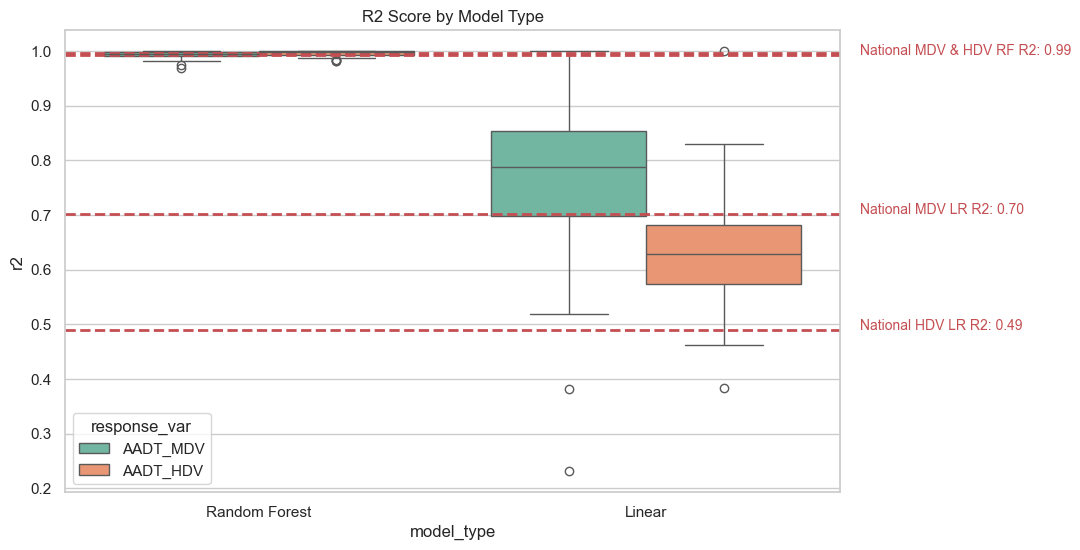

In [59]:
# visualize the difference between model_type for r2 score
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")
plt.figure(figsize=(10, 6))
sns.boxplot(x="model_type", y="r2", hue="response_var", data=df)
plt.title("R2 Score by Model Type")

# draw a line for national values
plt.axhline(r2_mdv_national, color='r', linestyle='dashed', linewidth=2)
plt.axhline(r2_hdv_national, color='r', linestyle='dashed', linewidth=2)
plt.axhline(r2_mdv_national_linear, color='r', linestyle='dashed', linewidth=2)
plt.axhline(r2_hdv_national_linear, color='r', linestyle='dashed', linewidth=2)
# label the line
plt.text(1.55, r2_mdv_national, f"National MDV & HDV RF R2: {r2_mdv_national:.2f}", color='r', fontsize=10)

plt.text(1.55, r2_mdv_national_linear, f"National MDV LR R2: {r2_mdv_national_linear:.2f}", color='r', fontsize=10)
plt.text(1.55, r2_hdv_national_linear, f"National HDV LR R2: {r2_hdv_national_linear:.2f}", color='r', fontsize=10)

Text(0.5, 1.0, 'R2 Score by State for Random Forest')

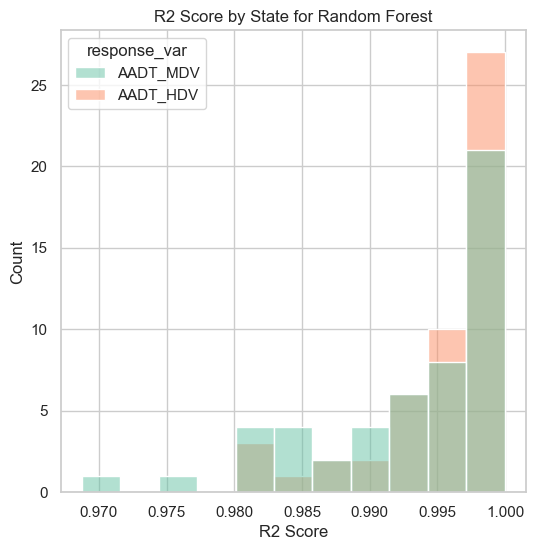

In [73]:
# now only look at data for model_type = "Random Forest"
plt.figure(figsize=(6, 6))
sns.histplot(x=df[df["model_type"] == "Random Forest"]["r2"], hue=df[df["model_type"] == "Random Forest"]["response_var"])
plt.xlabel("R2 Score")
plt.title("R2 Score by State for Random Forest")

Text(0.5, 1.0, 'Normalized RMSE Score by State for Random Forest')

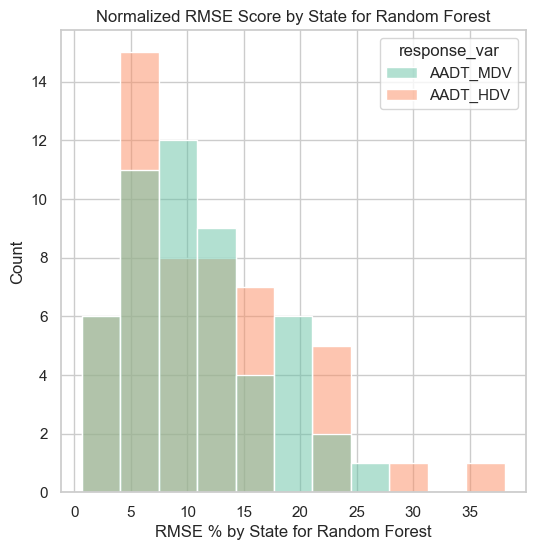

In [74]:
# now only look at data for model_type = "Random Forest"
plt.figure(figsize=(6, 6))
sns.histplot(x=np.sqrt(df[df["model_type"] == "Random Forest"]["mse"]) / df[df["model_type"] == "Random Forest"]["y_test_mean"] * 100, hue=df[df["model_type"] == "Random Forest"]["response_var"])
plt.xlabel("RMSE % by State for Random Forest")
plt.title("Normalized RMSE Score by State for Random Forest")

Text(0.5, 1.0, 'R2 Score by State for Linear Regression')

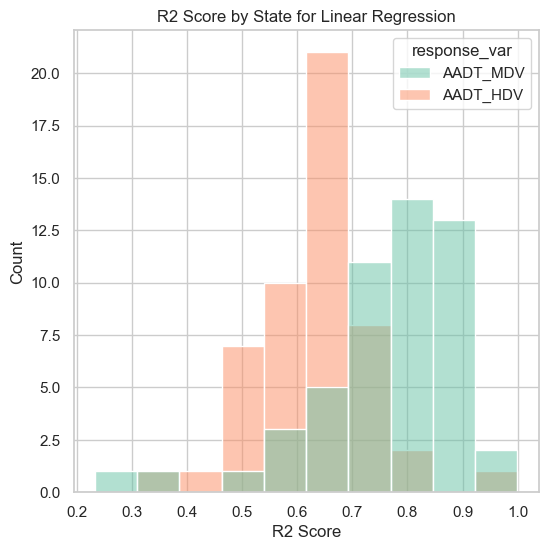

In [75]:
# now only look at data for model_type = "Random Forest"
plt.figure(figsize=(6, 6))
sns.histplot(x=df[df["model_type"] == "Linear"]["r2"], hue=df[df["model_type"] == "Linear"]["response_var"])
plt.xlabel("R2 Score")
plt.title("R2 Score by State for Linear Regression")

Text(0.5, 1.0, 'Normalized RMSE Score by State for Linear Regression')

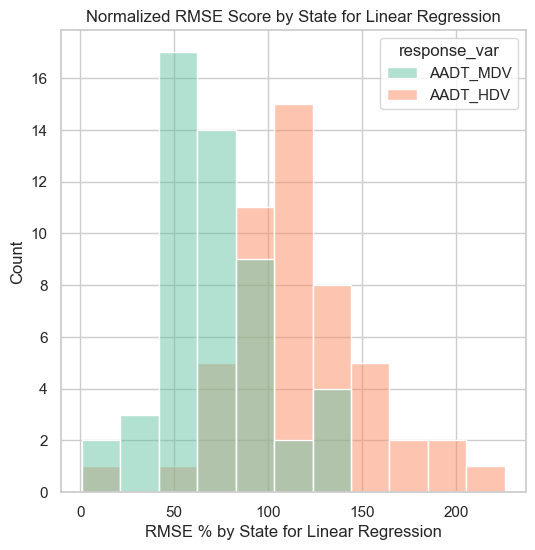

In [78]:
# now only look at data for model_type = "Random Forest"
plt.figure(figsize=(6, 6))
sns.histplot(x=np.sqrt(df[df["model_type"] == "Linear"]["mse"]) / df[df["model_type"] == "Linear"]["y_test_mean"] * 100, hue=df[df["model_type"] == "Linear"]["response_var"])
plt.xlabel("RMSE % by State for Linear Regression")
plt.title("Normalized RMSE Score by State for Linear Regression")